In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [2]:
file_path = "Diagonalization/diagonalizaton_results_"


# Diagonalization algorithm
df_diag_mixed = pd.read_csv(file_path + "Mixed_Diag.csv")
df_diag_PVs = pd.read_csv(file_path + "Fixed_PVs_Diag.csv")
df_diag_EVs = pd.read_csv(file_path + "Fixed_EVs_Diag.csv")

# AHE algorithm
df_ahe_mixed = pd.read_csv(file_path + "Mixed_AHE.csv")
df_ahe_PVs = pd.read_csv(file_path + "Fixed_PVs_AHE.csv")
df_ahe_EVs = pd.read_csv(file_path + "Fixed_EVs_AHE.csv")

#FP Algorithm
df_fp_mixed = pd.read_csv(file_path + "Mixed_FP.csv")
df_fp_PVs = pd.read_csv(file_path + "Fixed_PVs_FP.csv")
df_fp_EVs = pd.read_csv(file_path + "Fixed_EVs_FP.csv")

#SFP Algorithms
df_sfp_mixed = pd.read_csv(file_path + "Mixed_SFP.csv")
df_sfp_PVs = pd.read_csv(file_path + "Fixed_PVs_SFP.csv")
df_sfp_EVs = pd.read_csv(file_path + "Fixed_EVs_SFP.csv")


In [147]:
# add all dataframes 
df_all = [df_diag_mixed, df_diag_PVs, df_diag_EVs, 
          df_ahe_mixed,  df_ahe_PVs,  df_ahe_EVs, 
          df_fp_mixed,   df_fp_PVs,   df_fp_EVs, 
          df_sfp_mixed,  df_sfp_PVs,  df_sfp_EVs ]

algo_list = ["Diag", "AHE", "FP", "SFP"]

scen_list = ["Mixed", "Fixed_EVS", "Fixed_PVs"]

#****************************************************
offer_dict = dict()
for i in range(1,10):
    if i%2==0:
        offer_dict['offer_0'+str(i)] = "CAT_01"
    elif i%3==0:
        offer_dict['offer_0'+str(i)] = "CAT_02"
    else:
        offer_dict['offer_0'+str(i)] = "CAT_03"

#********************************************************
bids_dict = dict()
for i in range(1,10):
    if i%2==0:
        bids_dict['bids_0'+str(i)] = "CAT_01"
    elif i%3==0:
        bids_dict['bids_0'+str(i)] = "CAT_02"
    else:
        bids_dict['bids_0'+str(i)] = "CAT_03"
#****************************************************
col_dict= dict()
for i in range(1,10):
    col_dict[str(i)] = "DA"+str(i)

In [4]:
for df in df_all:
    df.drop(df[df.Iteration==0].index, inplace=True)
    df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

In [7]:
#**********************************************************
offer_col = ['offer_0'+str(x) for x in range(1,10)]
time_offer =['Time']
time_offer = [*offer_col, *time_offer]

#**********************************************************************
demand_col = ['bids_0'+str(x) for x in range(1,10)]
time_demand =['Time']
time_demand = [*demand_col, *time_demand]

# Offers, Demands  Last N Iterations Plot

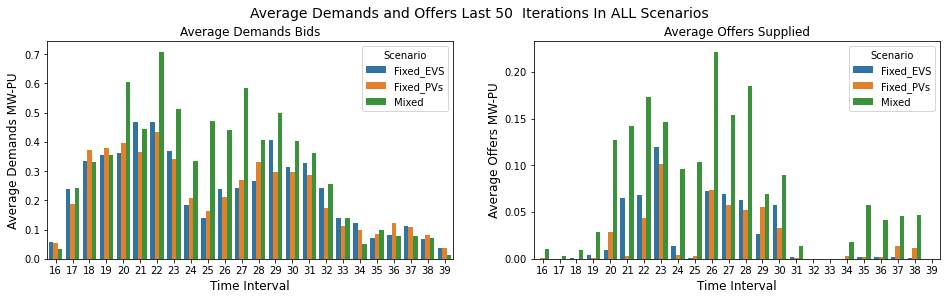

In [55]:
counter = 0
counter_scen=0
demand = []
offer =[]
scenario=[]
time=[]

# how many last iterations to show
last_iterations = 50
no_iterations = 300

#iterate trough all dataframes and average their offers bids : all DAs in each 3 scenario
for df in df_all:
    no_iterations = len(df.groupby('Iteration').mean())
    if no_iterations > last_iterations:
        df = df[df['Iteration'] > no_iterations - last_iterations]
    temp_offer = df.groupby('Time').mean().drop(columns=['Iteration']).reset_index()[time_offer].drop('Time',axis=1).mean(axis=1)
    temp_demand = df.groupby('Time').mean().drop(columns=['Iteration']).reset_index()[time_demand].drop('Time',axis=1).mean(axis=1)
    count=16
    for i in range(len(temp_offer)):
        demand.append(temp_demand[i])
        offer.append(temp_offer[i])
        scenario.append(scen_list[counter%3])
        time.append(count)
        count+=1
    counter+=1
    if counter % 3 == 0:
        counter_scen+=1

# Create Dataframe from listed Values
df_demand = pd.DataFrame({'Demands':demand,  'Scenario':scenario, 'Time':time})
df_offer = pd.DataFrame({"Offer":offer, 'Scenario':scenario, 'Time':time})

# Slice Dataframe for different plots

fig, axes = plt.subplots(1, 2, figsize=(16, 4))

sns.barplot(data= df_demand.groupby(['Time', 'Scenario']).mean().reset_index(),
            x='Time', y='Demands', hue='Scenario' , ax=axes[0])
axes[0].set_title("Average Demands Bids", fontsize=12)
axes[0].set_xlabel('Time Interval',fontsize=12);
axes[0].set_ylabel('Average Demands MW-PU',fontsize=12);

sns.barplot(data= df_offer.groupby(['Time', 'Scenario']).mean().reset_index(),
            x='Time', y='Offer', hue='Scenario' , ax=axes[1])
axes[1].set_title("Average Offers Supplied", fontsize=12)
axes[1].set_xlabel('Time Interval',fontsize=12);
axes[1].set_ylabel('Average Offers MW-PU',fontsize=12);

fig.suptitle('Average Demands and Offers Last %d  Iterations In ALL Scenarios'%last_iterations, fontsize=14, y=1.);

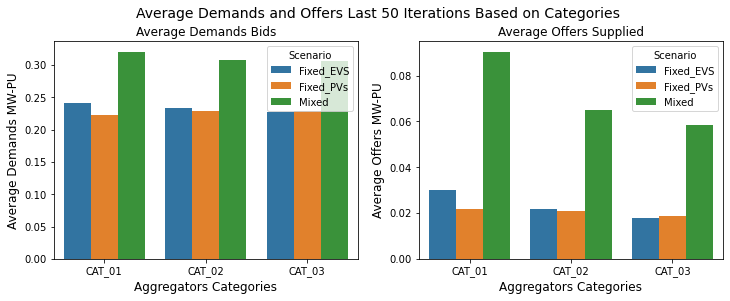

In [92]:
counter = 0
counter_scen=0
demand = []
offer =[]
scenario=[]
DAs_Cat=[]


# how many last iterations to show
last_iterations = 50
no_iterations = 300

#iterate trough all dataframes and average their offers bids : all DAs in each 3 scenario
for df in df_all:
    no_iterations = len(df.groupby('Iteration').mean())
    if no_iterations > last_iterations:
        df = df[df['Iteration'] > no_iterations - last_iterations]
    temp_offer = df[time_offer].drop('Time', axis=1).mean()
    temp_demand = df[time_demand].drop('Time', axis=1).mean() 
    
    for i in range(len(temp_offer)):
        demand.append(temp_demand[i])
        offer.append(temp_offer[i])
        cat = temp_offer.index[i]
        DAs_Cat.append(offer_dict[cat])
        scenario.append(scen_list[counter%3])
        
    counter+=1
    if counter % 3 == 0:
        counter_scen+=1

# # Create Dataframe from listed Values
df_demand = pd.DataFrame({'Demands':demand, 'Offer':offer,  'Scenario':scenario, 'Category':DAs_Cat})
#df_demand = df_demand.groupby(['Scenario', 'Category']).mean().reset_index().melt(id_vars=['Scenario','Category'],  var_name="Bid_Type", value_name="Bid_Value")

# df_offer = pd.DataFrame({"Offer":offer, 'Scenario':scenario, 'Time':time})
# df_compare = pd.DataFrame({'Demands':demand,  "Offer":offer, 'Scenario':scenario, 'Time':time})
# # Slice Dataframe for different plots

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.barplot(data= df_demand.groupby(['Scenario', 'Category']).mean().reset_index(),
            x='Category', y='Demands', hue='Scenario' , ax=axes[0])
axes[0].set_title("Average Demands Bids", fontsize=12)
axes[0].set_xlabel('Aggregators Categories',fontsize=12);
axes[0].set_ylabel('Average Demands MW-PU',fontsize=12);

sns.barplot(data= df_demand.groupby(['Scenario', 'Category']).mean().reset_index(),
            x='Category', y='Offer', hue='Scenario' , ax=axes[1])
axes[1].set_title("Average Offers Supplied", fontsize=12)
axes[1].set_xlabel('Aggregators Categories',fontsize=12);
axes[1].set_ylabel('Average Offers MW-PU',fontsize=12);


# sns.barplot(data= df_compare.groupby(['Scenario']).mean().reset_index(),
#             x='Time', y='Offer', hue='Scenario' , ax=axes[2])
# axes[2].set_title("Average Offers Supplied", fontsize=12)
# axes[2].set_xlabel('Time Interval',fontsize=12);
# axes[2].set_ylabel('Average Offers MW-PU',fontsize=12);


fig.suptitle('Average Demands and Offers Last %d Iterations Based on Categories'%last_iterations, fontsize=14, y=1.);



# Offers, Demands  Last N Iterations Based On Algorithms

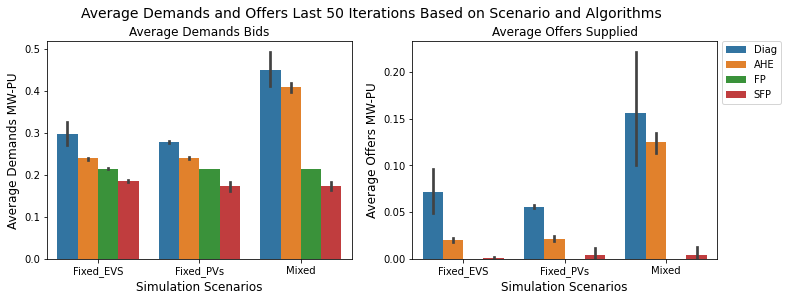

In [55]:
counter = 0
counter_algo=0
demand = []
offer =[]
scenario=[]
DAs_Cat=[]
algos =[]

# how many last iterations to show
last_iterations = 50
no_iterations = 300

#iterate trough all dataframes and average their offers bids : all DAs in each 3 scenario
for df in df_all:
    no_iterations = len(df.groupby('Iteration').mean())
    if no_iterations > last_iterations:
        df = df[df['Iteration'] > no_iterations - last_iterations]
    temp_offer = df[time_offer].drop('Time', axis=1).mean()
    temp_demand = df[time_demand].drop('Time', axis=1).mean() 
    
    for i in range(len(temp_offer)):
        demand.append(temp_demand[i])
        offer.append(temp_offer[i])
        cat = temp_offer.index[i]
        DAs_Cat.append(offer_dict[cat])
        scenario.append(scen_list[counter%3])
        algos.append(algo_list[counter_algo])
    counter+=1
    if counter % 3 == 0:
        counter_algo+=1

# # Create Dataframe from listed Values
df_demand = pd.DataFrame({'Demands':demand, 'Offer':offer,  'Scenario':scenario, 'Category':DAs_Cat, 'Algorithm':algos})
#df_demand = df_demand.groupby(['Scenario', 'Category']).mean().reset_index().melt(id_vars=['Scenario','Category'],  var_name="Bid_Type", value_name="Bid_Value")

# df_offer = pd.DataFrame({"Offer":offer, 'Scenario':scenario, 'Time':time})
# df_compare = pd.DataFrame({'Demands':demand,  "Offer":offer, 'Scenario':scenario, 'Time':time})
# # Slice Dataframe for different plots

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
order =['Diag', 'AHE', 'FP', 'SFP']

sns.barplot(data= df_demand.groupby(['Category','Algorithm','Scenario']).mean().reset_index(),
            x='Scenario', y='Demands', hue='Algorithm' , hue_order=order, ax=axes[0])
axes[0].set_title("Average Demands Bids", fontsize=12)
axes[0].set_xlabel('Simulation Scenarios',fontsize=12);
axes[0].set_ylabel('Average Demands MW-PU',fontsize=12);
axes[0].set_rasterized(True)

sns.barplot(data= df_demand.groupby(['Category','Algorithm','Scenario']).mean().reset_index(),
            x='Scenario', y='Offer', hue='Algorithm' , hue_order=order, ax=axes[1])
axes[1].set_title("Average Offers Supplied", fontsize=12)
axes[1].set_xlabel('Simulation Scenarios',fontsize=12);
axes[1].set_ylabel('Average Offers MW-PU',fontsize=12);
axes[1].set_rasterized(True)

handles, labels = axes[0].get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper right')
fig.legend(handles, labels, bbox_to_anchor=(0.98, 0.90))

for ax in axes:
    ax.get_legend().remove()
    
fig.suptitle('Average Demands and Offers Last %d Iterations Based on Scenario and Algorithms'%last_iterations, fontsize=14, y=1.);



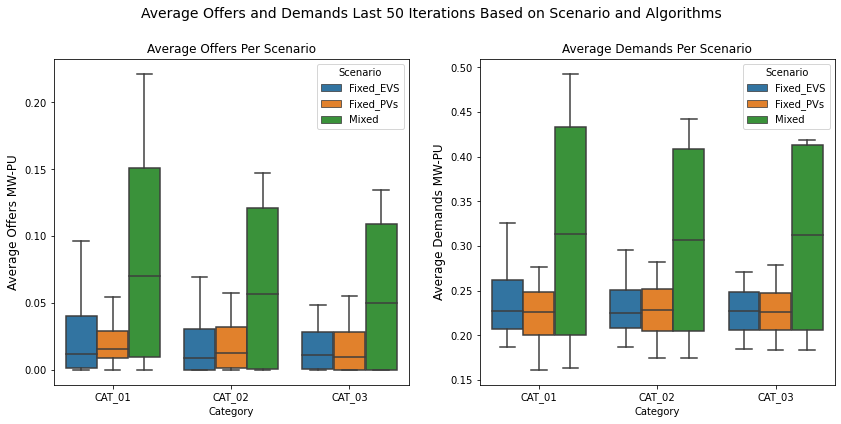

In [125]:
counter = 0
counter_algo=0
demand = []
offer =[]
scenario=[]
DAs_Cat=[]
algos =[]

# how many last iterations to show
last_iterations = 50
no_iterations = 300

#iterate trough all dataframes and average their offers bids : all DAs in each 3 scenario
for df in df_all:
    no_iterations = len(df.groupby('Iteration').mean())
    if no_iterations > last_iterations:
        df = df[df['Iteration'] > no_iterations - last_iterations]
    temp_offer = df[time_offer].drop('Time', axis=1).mean()
    temp_demand = df[time_demand].drop('Time', axis=1).mean() 
    
    for i in range(len(temp_offer)):
        demand.append(temp_demand[i])
        offer.append(temp_offer[i])
        cat = temp_offer.index[i]
        DAs_Cat.append(offer_dict[cat])
        scenario.append(scen_list[counter%3])
        algos.append(algo_list[counter_algo])
    counter+=1
    if counter % 3 == 0:
        counter_algo+=1

# # Create Dataframe from listed Values
df_demand = pd.DataFrame({'Demands':demand, 'Offers':offer,  'Scenario':scenario, 'Category':DAs_Cat, 'Algorithms':algos})


fig, axes = plt.subplots(1, 2, figsize=(14, 6))
order =['Diag', 'AHE', 'FP', 'SFP']

df_temp = df_demand[[ 'Offers', 'Scenario', 'Category','Algorithms']]
df_temp = df_temp.melt(id_vars=['Category','Scenario','Algorithms'],  var_name="Bid_Type", value_name="Bid_Value").groupby(['Category','Scenario','Algorithms']).mean().reset_index()
#df_temp = df_temp.melt(id_vars=['Category','Scenario'],  var_name="Bid_Type", value_name="Bid_Value").groupby(['Category','Scenario','Bid_Type']).mean().reset_index()
#df_temp = df_temp.melt(id_vars=['Category','Scenario'],  var_name="Bid_Type", value_name="Bid_Value").groupby(['Category','Scenario','Bid_Type']).mean().reset_index()

sns.boxplot(data= df_temp, x='Category', y='Bid_Value', hue='Scenario' , ax=axes[0])
axes[0].set_ylabel('Average Offers MW-PU',fontsize=12);
axes[0].set_title('Average Offers Per Scenario',fontsize=12);

df_temp = df_demand[[ 'Demands', 'Scenario', 'Category','Algorithms']]
df_temp = df_temp.melt(id_vars=['Category','Scenario','Algorithms'],  var_name="Bid_Type", value_name="Bid_Value").groupby(['Category','Scenario','Algorithms']).mean().reset_index()

sns.boxplot(data= df_temp, x='Category', y='Bid_Value', hue='Scenario' , ax=axes[1])
axes[1].set_ylabel('Average Demands MW-PU',fontsize=12);
axes[1].set_title('Average Demands Per Scenario',fontsize=12);

fig.suptitle('Average Offers and Demands Last %d Iterations Based on Scenario and Algorithms'%last_iterations, fontsize=14, y=1.);


<AxesSubplot:xlabel='Algorithms', ylabel='value'>

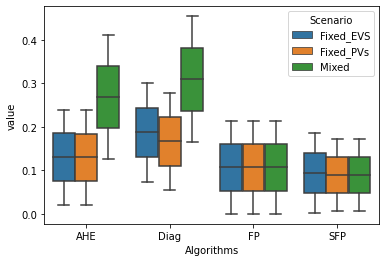

In [135]:
#df_demand.melt(id_vars=['Category','Scenario','Algorithms']).groupby(['Algorithms','Scenario', 'variable']).mean().reset_index()
sns.boxplot(data= df_demand.melt(id_vars=['Category','Scenario','Algorithms']).groupby(['Algorithms','Scenario', 'variable']).mean().reset_index(),
            x='Algorithms', y='value', hue='Scenario' )

# Demand Bids Line plot Based on Time

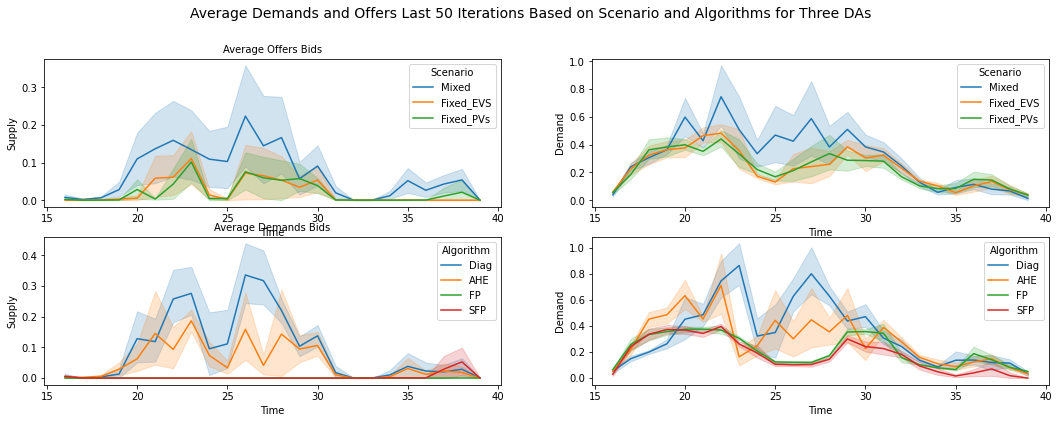

In [38]:
time =[]
offer_DAs  = []
demand_DAs = []
scenario   = []
algorithm  = []
offer_value =[]
demand_value=[]
counter = 0
counter_algo=0

# Take Out Selected DAs for demonstration
selected_offer_DAs=['offer_01', 'offer_02', 'offer_03']
selected_demand_DAs=['bids_01', 'bids_02', 'bids_03']

# If we want to go based on algorithms or scenario (Average)
algorithm_selection = [[0,1,2],[3,4,5],[6,7,8],[9,10,11]]
scenario_selection = [[0,3,6,9],[1,4,7,10],[2,5,8,11]]

# how many last iterations to show
last_iterations = 50
no_iterations = 300

#iterate trough all dataframes and average their offers bids : all DAs in each 3 scenario
for df in df_all:
    no_iterations = len(df.groupby('Iteration').mean())
    
    if no_iterations > last_iterations:
        df = df[df['Iteration'] > no_iterations - last_iterations]
    
    temp_offer  =  df.groupby('Time').mean()[selected_offer_DAs].reset_index()
    temp_demand =  df.groupby('Time').mean()[selected_demand_DAs].reset_index()
    
    for da in selected_offer_DAs:
        for t in temp_offer['Time']:
            time.append(t)
        for v in temp_offer[da]:
            scenario.append(scen_list[counter%3])
            algorithm.append(algo_list[counter_algo])
            offer_DAs.append(da)
            offer_value.append(v)
    
    for da in selected_demand_DAs:
        for v in temp_demand[da]:
            demand_DAs.append(da)
            demand_value.append(v)
    counter+=1
    if counter %3 ==0:
        counter_algo+=1

df_compare = pd.DataFrame({'Time':time, 'Scenario':scenario, 'Algorithm':algorithm,
                           'Offer_DAs':offer_DAs,'Supply':offer_value,
                          'Demand_DAs':demand_DAs, 'Demand':demand_value})

fig, axes = plt.subplots(2, 2, figsize=(18, 6))


sns.lineplot(data=df_compare, x='Time', y='Supply', hue='Scenario' ,ax=axes[0,0])  #style='Offer_DAs')
axes[0,0].set_title("Average Offers Bids", fontsize=10)


sns.lineplot(data=df_compare, x='Time', y='Supply', hue='Algorithm' ,ax=axes[1,0])
#axes[0,1].set_title("Average Offers Bids", fontsize=10)

sns.lineplot(data=df_compare, x='Time', y='Demand', hue='Scenario' ,ax=axes[0,1])
axes[1,0].set_title("Average Demands Bids", fontsize=10)

sns.lineplot(data=df_compare, x='Time', y='Demand', hue='Algorithm' ,ax=axes[1,1])
#axes[1,1].set_title("Average Demands Bids", fontsize=10)

fig.suptitle('Average Demands and Offers Last %d Iterations Based on Scenario and Algorithms for Three DAs'%last_iterations, fontsize=14, y=1.);

<AxesSubplot:xlabel='Category', ylabel='Offers'>

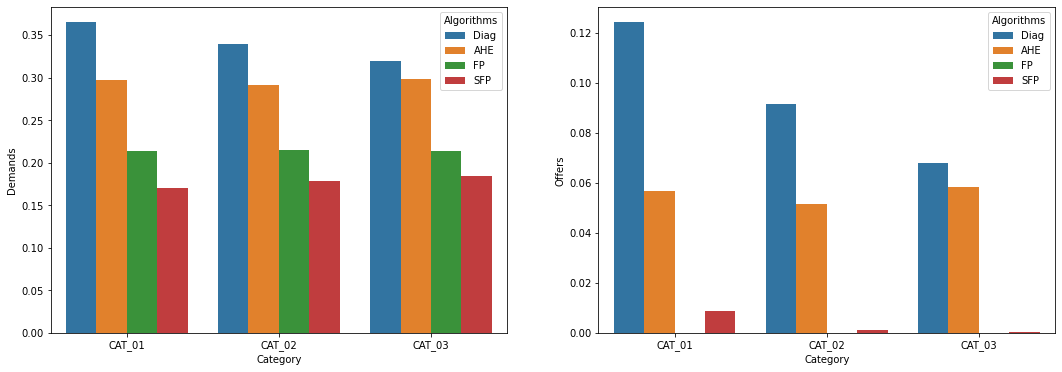

In [160]:
# how many last iterations to show
last_iterations = 50
no_iterations = 300

counter = 0
counter_algo=0

df_demand = pd.DataFrame()
df_offer  = pd.DataFrame()

first_iter = True

#iterate trough all dataframes and average their offers bids : all DAs in each 3 scenario
for df in df_all:
    no_iterations = len(df.groupby('Iteration').mean())
    
    if no_iterations > last_iterations:
        df = df[df['Iteration'] > no_iterations - last_iterations]
    
    temp_offer  = df.groupby('Time').mean().reset_index()[time_offer]
    temp_offer['Algorithms'] = algo_list[counter_algo]
    
    temp_demand = df.groupby('Time').mean().reset_index()[time_demand]
    temp_demand['Algorithms'] = algo_list[counter_algo]
    
    if first_iter :
        df_demand = temp_demand.copy(deep=True)
        df_offer  = temp_offer.copy(deep=True)
        first_iter = False
    else:
        df_demand = pd.concat([df_demand, temp_demand])
        df_offer  = pd.concat([df_offer, temp_offer])
    
    counter+=1
    if counter %3 ==0:
        counter_algo+=1

# Reshape Dataframes
df_demand = df_demand.melt(id_vars=['Time', 'Algorithms'], var_name="Category", value_name="Demands")  
df_offer  = df_offer.melt(id_vars=['Time', 'Algorithms'], var_name="Category", value_name="Offers")

# Change The Values to category
for key, value in bids_dict.items():
    df_demand.loc[df_demand.Category==key, 'Category']=value

for key, value in offer_dict.items():
    df_offer.loc[df_offer.Category==key, 'Category']=value

order =['Diag', 'AHE', 'FP', 'SFP']

# Plot
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(data=df_demand.groupby([ 'Algorithms', 'Category']).mean().reset_index(), 
            x='Category', y='Demands', hue='Algorithms', hue_order=order, ax=axes[0] )

sns.barplot(data=df_offer.groupby([ 'Algorithms', 'Category']).mean().reset_index(), 
            x='Category', y='Offers', hue='Algorithms', hue_order=order, ax=axes[1] )



In [155]:
df_demand.groupby([ 'Algorithms', 'Category']).mean().reset_index()

,Algorithms,Category,Time,Demands
0,AHE,CAT_01,27.5,0.297466
1,AHE,CAT_02,27.5,0.291755
2,AHE,CAT_03,27.5,0.298774
3,Diag,CAT_01,27.5,0.364956
4,Diag,CAT_02,27.5,0.340005
5,Diag,CAT_03,27.5,0.319958
6,FP,CAT_01,27.5,0.213627
7,FP,CAT_02,27.5,0.215093
8,FP,CAT_03,27.5,0.213935
9,SFP,CAT_01,27.5,0.170370
